In [1]:
# Import functions 
import sys
sys.path.insert(0, '..')
from racecar_utils import *   

In [2]:
# Start ROS Node
rospy.init_node('racecar')
rc = Racecar()
print('ROS node started successfully')

ROS node started successfully


# Cone Following

<p style='font-size:1.75rem;line-height:1.5'>
    Let's apply our knowledge of python and color spaces (ie. HSV) to identify and follow a cone!
    </p>

# Find HSV Values of the Cone

<p style='font-size:1.75rem;line-height:1.5'>
    Set the HSV lower and upper bounds to detect the cone!
    <ol style='font-size:1.75rem;line-height:1.5'>
        <li>Use <code>hsv_select(&lt;seconds&gt;)</code> to mask for the cone!</li>
        <li>Update <code>HSV_LOWER</code> and <code>HSV_UPPER</code>!</li>
    </ol>
    </p>

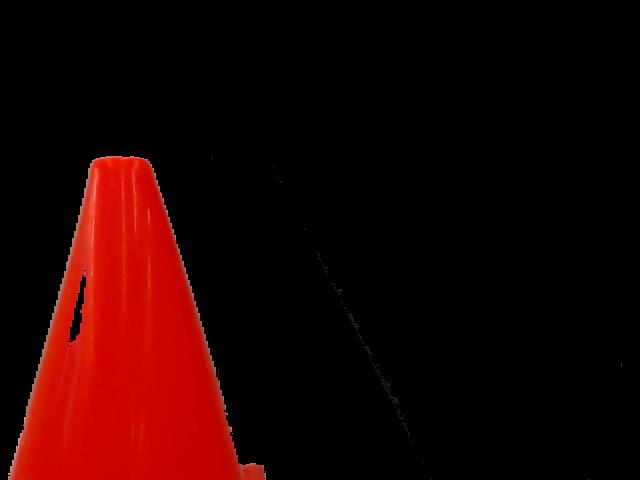

IntRangeSlider(value=(0, 179), description=u'Hue:', layout=Layout(width=u'100%'), max=179)

IntRangeSlider(value=(0, 255), description=u'Saturation:', layout=Layout(width=u'100%'), max=255)

IntRangeSlider(value=(0, 255), description=u'Value:', layout=Layout(width=u'100%'), max=255)

END OF HSV SELECT


In [3]:
VIDEO_TIME = 120
hsv_select_live(VIDEO_TIME) # default: 10 sec

In [3]:
HSV_LOWER = np.array([0, 48, 0])
HSV_UPPER = np.array([14, 255, 255])

# Speed

<p style='font-size:1.75rem;line-height:1.5'>
    <code>get_speed</code> determines if the car will drive forwards or backwards depending on how close the car is to the cone. 
    <br>The closer the cone, the larger the contour will be.
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    If the car is within a specific range (aka within 1 ft of the cone), then the car will not drive. 
    <br>Else it will drive forwards or backwards to get to the correct range.
    </p>

In [4]:
DRIVE_SPEED = 0.3    # racecar speed; should be a float between 0 to 1
MIN_SIZE = 12000       # contour is too small, move forwards
MAX_SIZE = 30000       # contour is too large, move backwards

def get_speed(area):
    # TASK: If the area is smaller than the MIN_SIZE, set speed to DRIVE_SPEED (drive forward) 
    #       Else if the area is larger than the MAX_SIZE, set speed to the -DRIVE_SPEED (drive backwards)
    #       Else, the area is within range, so set speed to 0 (don't drive).
    if area < MIN_SIZE:
        speed = DRIVE_SPEED
        print("too small")
    elif area > MAX_SIZE:
        speed = -DRIVE_SPEED
        print("too large")
    else:
        speed = 0
        print("PERFECT")
        
    return speed

# Cone Following

<p style='font-size:1.75rem;line-height:1.5'>
    <b style='color:red'>Run the cell blocks below to test your code! </b>
    <br><br>
    Modify the hsv bounds from above to find the best values for your racecar. Different lighting conditions will cause the bounds to change. The better your HSV values, the better your car will run!
    <br><br>
    Make sure to hold down the autonomous button to test your code!
    <br><br>
    <b style='color:red'>Remember to get a sticker from a TA before taking your car off the block!</b>
    </p>

In [5]:
TEST_TIME = 120

In [7]:
last_time = time.time()
def cone_follow(img):
    global last_time
    speed, angle = [0, 0]
    
    # create hsv mask
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(img_hsv, HSV_LOWER, HSV_UPPER)
    
    # find contours
    contours = cv2.findContours(mask, 3, 2)[1] 
    
    # get greatest_contour if 1. contours exist, 2. contour is large enough
    if contours == [] or contours is None:
        print('No contours')
    else:   
        greatest_contour = max(contours, key = cv2.contourArea) # get current largest contour
        area = cv2.contourArea(greatest_contour)
        speed = get_speed(area)
        angle = get_angle(greatest_contour, (speed, angle))
        cv2.drawContours(img, [greatest_contour], -1, (0,255, 0), 2)
        rc.drive(speed, angle)
    
    # decrease frames per sec 
    if VIDEO and time.time()-last_time>=1:
        show_frame(img)
        last_time = time.time()
        
    return img

rc.run(cone_follow, limit=TEST_TIME) 

too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
too small
too small
too small
too small
too small
too small
too small
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
PERFECT
too small
too small
too small
PERFECT
PERFEC

too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large


too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
too large
END OF ROSPY RUN
